# <center>**Online Shoppers Purchasing Intention**</center>
***

### Kelompok LAMBA :
Abdul Ghofur <br>
Angeline Shirley<br>
Dzaky Fachrezi<br>
Iqbal Octoryaz<br>
M. Tohar Sagara<br>
Rahma Yanti<br>
Syofwan Aldia<br>
Widi Bagaskara

## **About Dataset**
***

Dataset Online Shoppers Purchasing Intention terdiri dari 18 features yang dikelompokan berdasarkan tipe data nya : <br>

| **Numerical data**     | **Categorical data**|
|----------------------- |------------- |
|Administrative | OperatingSystems|
|Administrative_Duration | Browser|
|Informational | Region|
|Informational_Duration | TrafficType|
|ProductRelated | Month|
|ProductRelated_Duration | VisitorType|
|BounceRates | Weekend |
|ExitRates | Revenue|
|PageValues |
|SpecialDay |

***
## **Data Pre-Processing**
***

## **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from imblearn import under_sampling, over_sampling
from sklearn.model_selection import train_test_split

In [58]:
import warnings
warnings.filterwarnings('ignore')

## **Read Dataset**

In [2]:
df_ol_shop = pd.read_csv('./Data/online_shoppers_intention.csv')

df_ol_shop.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
11971,3,126.500000,0,0.0,36,576.857143,0.005556,0.010880,0.0,0.0,Dec,1,1,4,3,Returning_Visitor,False,False
9126,0,0.000000,0,0.0,4,18.000000,0.000000,0.075000,0.0,0.0,Dec,3,2,2,3,New_Visitor,False,False
6987,2,57.400000,2,69.4,13,1316.533333,0.011765,0.050000,0.0,0.0,Aug,2,2,3,4,Returning_Visitor,True,False
5033,0,0.000000,0,0.0,26,781.500000,0.007692,0.030769,0.0,0.2,May,2,2,2,3,Returning_Visitor,False,False
9555,1,18.833333,0,0.0,2,23.833333,0.000000,0.050000,0.0,0.0,Dec,3,2,1,10,Returning_Visitor,False,False


## **1. Data Cleansing**
***

#### A. Missing Handle Value


In [3]:
df_ol_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
# Check missing value foreach column 

df_ol_shop.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

##### Tidak terdapat missing value, sehingga tidak perlu handdling missing value.

#### B. Handle duplicated data

In [5]:
# Check total duplicate

df_ol_shop.duplicated().sum()

125

In [6]:
# Copy for assigning df_ol_shop
df_ol_shop_2 = df_ol_shop.copy()

# Drop Duplicate
df_ol_shop_2 = df_ol_shop_2.drop_duplicates(ignore_index=True)

df_ol_shop_2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12201,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12202,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12203,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [7]:
# Check after delete duplicate data 

df_ol_shop_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

##### Menghapus data duplicates

#### C. Handle outliers

In [8]:
# pengelompokan kolom berdasarkan jenisnya

nums = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated','ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

cats = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month', 'VisitorType', 'Weekend', 'Revenue']

In [9]:
df_ol_shop_2[nums].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


##### Menggunakan Zscore

In [10]:
print('Data Sebelum handling outlier: ', len(df_ol_shop_2))

filtered_entries = np.array([True] * len(df_ol_shop_2))
# print(filtered_entries)

for col in nums:
    zscore = abs(stats.zscore(df_ol_shop_2[col]))
    # print(zscore)
    filtered_entries = (zscore < 3) & filtered_entries
    # print(filtered_entries)

df_ol_shop_zscore = df_ol_shop_2[filtered_entries]
print('Data sesudah handling outlier: ', len(df_ol_shop_zscore))

Data Sebelum handling outlier:  12205
Data sesudah handling outlier:  10020


##### Menggunakan IQR

In [11]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_ol_shop_2)}')

filtered_entries = np.array([True] * len(df_ol_shop_2))
for col in nums:
    Q1 = df_ol_shop_2[col].quantile(0.25)
    Q3 = df_ol_shop_2[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_ol_shop_2[col] >= low_limit) & (df_ol_shop_2[col] <= high_limit)) & filtered_entries
    
df_ol_shop_iqr = df_ol_shop_2[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_ol_shop_iqr)}')

Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlier: 5044


#### Menggunakan Flooring and Capping

In [12]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_ol_shop_2)}')

filtered_entries = np.array([True] * len(df_ol_shop_2))
for col in nums:
    low_limit = df_ol_shop_2[col].quantile(0.10)
    high_limit = df_ol_shop_2[col].quantile(0.90)
    

    filtered_entries = ((df_ol_shop_2[col] >= low_limit) & (df_ol_shop_2[col] <= high_limit)) & filtered_entries
    
df_ol_shop_flor_cap = df_ol_shop_2[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_ol_shop_flor_cap)}')

Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlier: 5150


##### Handle Outlier dengan menggunakan Zscore menghasilkan perubahan jumlah data dari 12205 menjadi 10020, sedangkan menggunakan IQR dan Flooring and Capping terlalu banyak data (>10%) yang dihapus . Oleh Karena itu tidak perlu dilakukan handling outlier(penghapusan data outlier), melainkan dilakukan feature transformation saja

#### D. Feature transformation

##### Data sebaran sebelum dilakukan Feature transformation

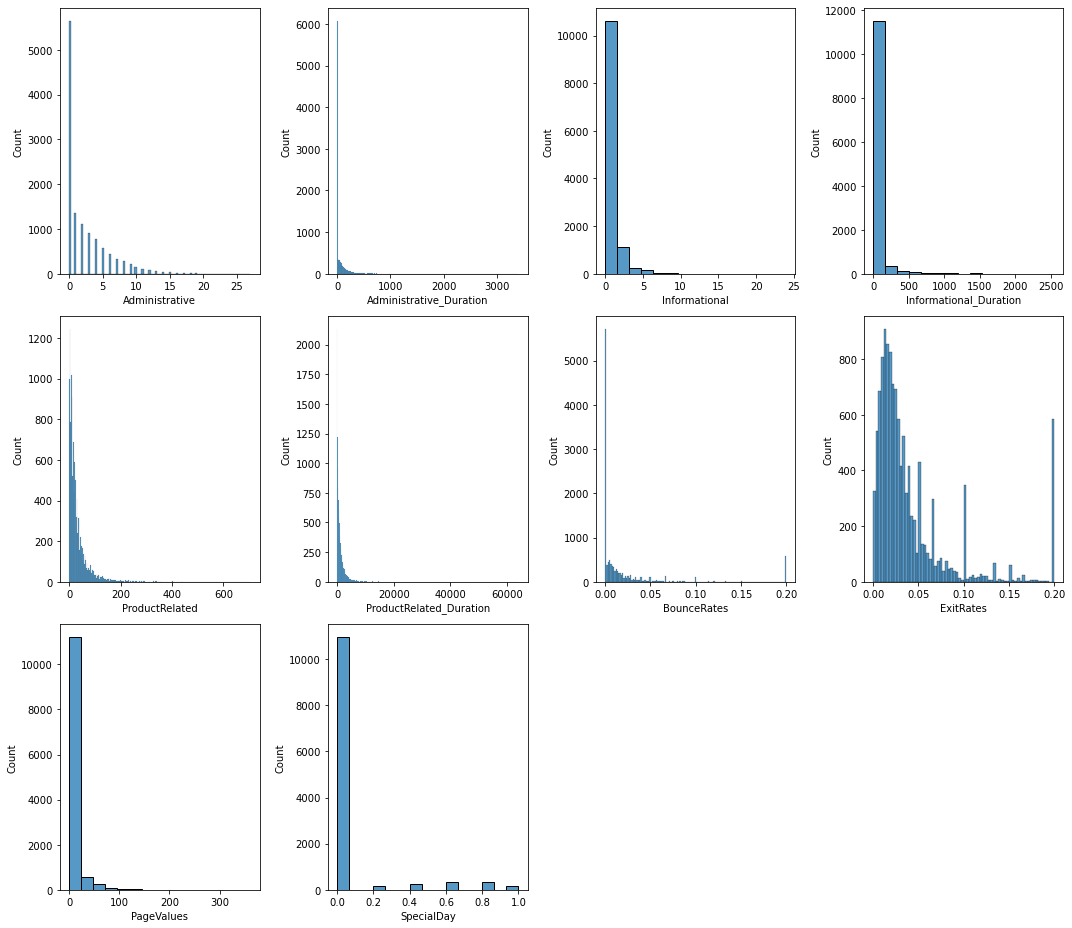

In [13]:
fig = plt.figure(figsize=(15, 13))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 4, i+1) # kita set posisi plotnya di layout
    sns.histplot(data=df_ol_shop_2, x=nums[i]) # 
    plt.tight_layout()

#### Menggunakan Robust Scaler

In [14]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [15]:
df_ol_shop_robust_scaler = df_ol_shop_2.copy()

df_ol_shop_robust_scaler.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6745,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Jul,3,2,1,13,Returning_Visitor,False,False
3530,0,0.0,0,0.0,20,1006.666667,0.000000,0.005556,0.0,0.6,May,1,1,1,2,Returning_Visitor,False,False
9572,0,0.0,2,0.0,3,56.750000,0.100000,0.125000,0.0,0.0,Nov,1,1,1,2,Returning_Visitor,False,False
8684,0,0.0,0,0.0,11,326.500000,0.036364,0.077273,0.0,0.0,Nov,1,1,4,3,Returning_Visitor,False,False
6758,4,49.3,0,0.0,12,524.969231,0.000000,0.012500,0.0,0.0,Sep,2,2,5,2,New_Visitor,False,False


In [16]:
nums_robust = []
for col in nums:
    col_name = 'robust_' + col
    nums_robust.append(col_name)
    df_ol_shop_robust_scaler[col_name] = scaler.fit_transform(df_ol_shop_robust_scaler[col].values.reshape(len(df_ol_shop_robust_scaler), 1))
    df_ol_shop_robust_scaler = df_ol_shop_robust_scaler.drop(columns=col)

df_ol_shop_robust_scaler.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,robust_Administrative,robust_Administrative_Duration,robust_Informational,robust_Informational_Duration,robust_ProductRelated,robust_ProductRelated_Duration,robust_BounceRates,robust_ExitRates,robust_PageValues,robust_SpecialDay
8980,Nov,3,2,6,13,Returning_Visitor,False,False,4.25,10.596621,6.0,114.333333,2.933333,1.988977,0.525972,-0.105140,1.307682,0.0
2844,May,3,2,8,4,Returning_Visitor,False,False,-0.25,-0.095037,0.0,0.000000,0.166667,0.301751,-0.173913,-0.147892,0.000000,0.8
583,Mar,1,1,9,8,New_Visitor,False,False,1.00,2.682154,0.0,0.000000,-0.500000,-0.309108,-0.173913,0.104128,0.000000,0.0
10891,Nov,3,2,3,1,Returning_Visitor,False,False,-0.25,-0.095037,0.0,0.000000,0.766667,0.356185,0.557794,0.533339,0.000000,0.0
9960,Nov,2,2,2,2,Returning_Visitor,False,False,-0.25,-0.095037,2.0,288.000000,3.800000,4.763227,0.049968,-0.353828,0.000000,0.0


#### Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Robust Scaler

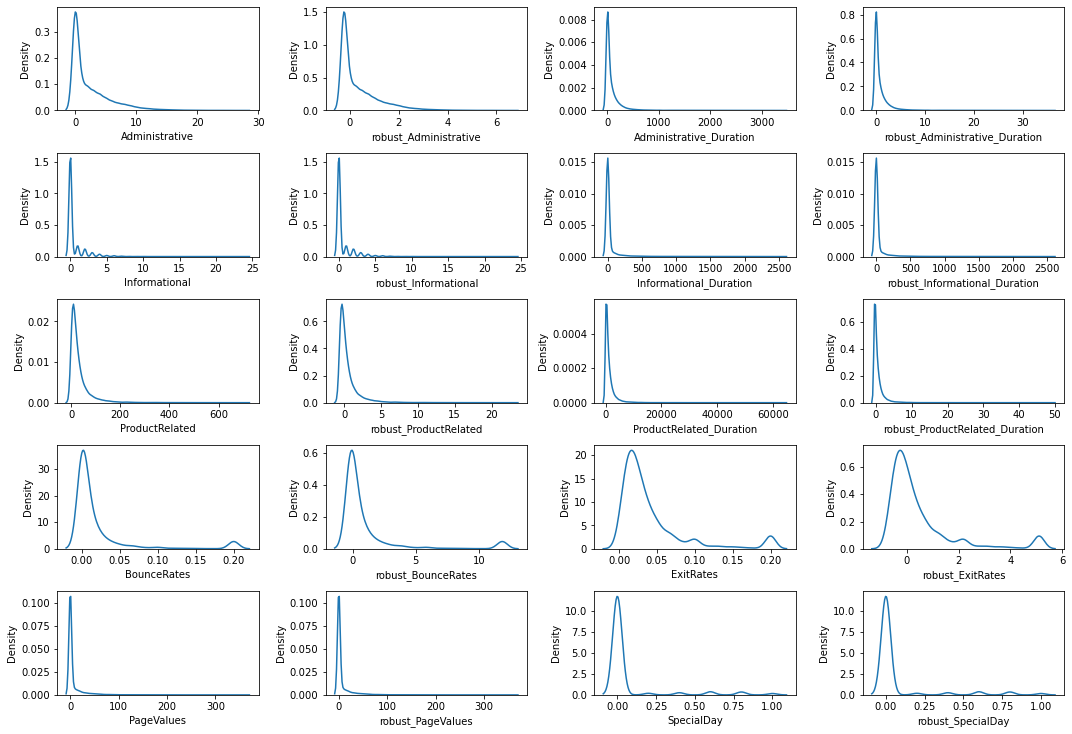

In [17]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_2, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_robust_scaler, x=nums_robust[i])

    plt.tight_layout()

##### Menggunakan Log Transformation

In [18]:
df_ol_shop_log_transformation = df_ol_shop_2.copy()

df_ol_shop_log_transformation.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
9450,1,24.916667,1,7.666667,98,3561.139286,0.008163,0.018367,78.197796,0.0,Nov,2,2,1,13,Returning_Visitor,True,True
8663,0,0.000000,0,0.000000,4,17.000000,0.100000,0.150000,0.000000,0.0,Dec,2,2,1,1,Returning_Visitor,False,False
8199,4,643.833333,0,0.000000,17,508.250000,0.031579,0.052632,0.000000,0.0,Nov,2,4,1,1,Returning_Visitor,False,False
4277,5,262.500000,0,0.000000,45,1456.273810,0.000000,0.018707,13.530684,0.0,May,2,2,7,4,Returning_Visitor,False,True
7995,0,0.000000,0,0.000000,3,61.750000,0.000000,0.066667,0.000000,0.0,Nov,2,10,1,3,Returning_Visitor,False,False


In [19]:
nums_log = []
for col in nums:
    log_name_colum = 'log_' + col
    nums_log.append(log_name_colum)
    # print(log_name_colum)
    # np.log(df.mask(df <=0)).fillna(0)
    df_ol_shop_log_transformation[log_name_colum] = np.log(df_ol_shop_log_transformation[col])
    # df_ol_shop_log_transformation[log_name_colum] = np.log(df_ol_shop_log_transformation[col].mask(df_ol_shop_log_transformation[col] <= 0)).fillna(0)
    df_ol_shop_log_transformation = df_ol_shop_log_transformation.drop(columns=col)

# print(nums_log)
df_ol_shop_log_transformation.sample(5)


/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/array

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,log_Administrative,log_Administrative_Duration,log_Informational,log_Informational_Duration,log_ProductRelated,log_ProductRelated_Duration,log_BounceRates,log_ExitRates,log_PageValues,log_SpecialDay
4322,May,3,2,3,4,Returning_Visitor,False,False,1.791759,5.411646,-inf,-inf,3.496508,6.519074,-5.164786,-3.928023,-inf,-inf
9263,Nov,1,1,1,2,Returning_Visitor,True,False,1.098612,7.331879,0.693147,4.51086,4.094345,7.344775,-5.059426,-3.652512,3.132159,-inf
1176,Mar,2,2,4,8,Returning_Visitor,False,False,1.386294,2.813411,-inf,-inf,4.219508,7.860857,-5.828946,-4.354946,-inf,-inf
120,Feb,2,4,4,1,Returning_Visitor,False,False,-inf,-inf,-inf,-inf,1.791759,5.493061,-inf,-3.401197,-inf,-inf
3400,May,2,2,1,13,Returning_Visitor,False,False,-inf,-inf,-inf,-inf,2.708050,7.402147,-3.688879,-2.677279,-inf,-0.223144


#### Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Log Transformation

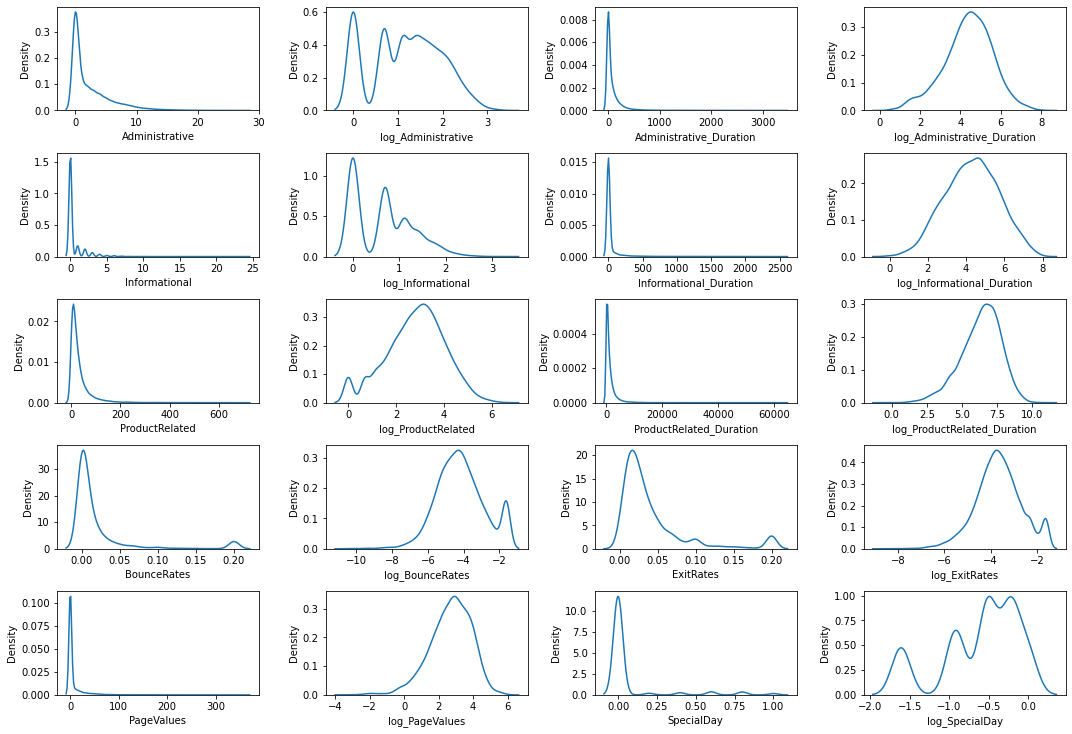

In [20]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_2, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_log_transformation, x=nums_log[i])

    plt.tight_layout()

#### Menggunakan Standardization

In [21]:
from sklearn.preprocessing import StandardScaler
standar_scaler = StandardScaler()

In [22]:
df_ol_shop_std_scaler = df_ol_shop_2.copy()

In [23]:
nums_std = []
for col in nums:
    col_name = 'std_' + col
    nums_std.append(col_name)
    df_ol_shop_std_scaler[col_name] = standar_scaler.fit_transform(df_ol_shop_std_scaler[col].values.reshape(len(df_ol_shop_std_scaler), 1))
    df_ol_shop_std_scaler = df_ol_shop_std_scaler.drop(columns=col)

df_ol_shop_std_scaler.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,std_Administrative,std_Administrative_Duration,std_Informational,std_Informational_Duration,std_ProductRelated,std_ProductRelated_Duration,std_BounceRates,std_ExitRates,std_PageValues,std_SpecialDay
6323,Jul,1,1,3,3,Returning_Visitor,True,False,0.498791,0.235252,-0.398824,-0.246257,0.133530,-0.323837,-0.053512,-0.176172,-0.318962,-0.310240
1784,Mar,1,1,1,10,Returning_Visitor,False,False,2.900977,0.595158,1.953076,0.380132,0.245659,1.072738,-0.356389,0.048672,-0.140313,-0.310240
2122,May,2,2,1,1,Returning_Visitor,False,False,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,2.694899
130,Feb,2,6,1,2,Returning_Visitor,True,False,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.513139,-0.450137,1.268054,-0.318962,-0.310240
349,Mar,2,2,3,1,Returning_Visitor,True,False,1.699884,0.272439,0.385143,-0.118976,-0.292557,-0.473546,-0.450137,-0.537229,0.735468,-0.310240


#### Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Standardization

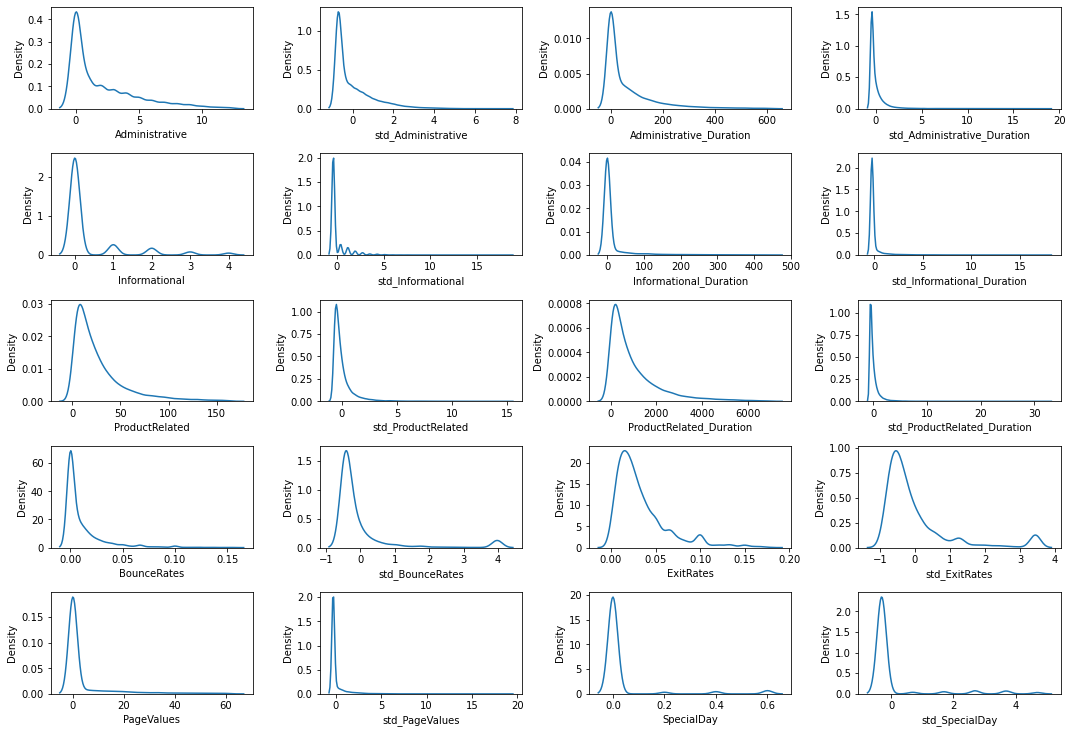

In [24]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_zscore, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_std_scaler, x=nums_std[i])

    plt.tight_layout()

#### Menggunakan Yeo - Jonshon

In [25]:
from sklearn.preprocessing import PowerTransformer
scaler_yeo_jonshon = PowerTransformer(method='yeo-johnson')

In [26]:
df_ol_shop_yeo_jo = df_ol_shop_2.copy()
df_ol_shop_yeo_jo.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4673,3,37.500000,0,0.0,46,1804.900000,0.017730,0.039362,0.000000,0.0,May,2,2,3,6,Returning_Visitor,False,False
779,4,56.000000,1,88.0,22,1734.780952,0.000000,0.010143,0.000000,0.0,Mar,3,2,3,9,Returning_Visitor,True,False
4969,18,255.716667,0,0.0,184,7706.546429,0.002083,0.013793,6.738395,0.0,May,2,2,9,6,Returning_Visitor,False,False
5642,3,82.600000,0,0.0,1,16.200000,0.000000,0.050000,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False,False
3390,0,0.000000,0,0.0,16,571.500000,0.041667,0.091667,0.000000,0.4,May,7,1,6,3,Returning_Visitor,False,False


In [27]:
nums_yj = []
for col in nums:
    col_name = 'yj_' + col
    nums_yj.append(col_name)
    df_ol_shop_yeo_jo[col_name] = scaler_yeo_jonshon.fit_transform(df_ol_shop_yeo_jo[col].values.reshape(len(df_ol_shop_yeo_jo), 1))
    df_ol_shop_yeo_jo = df_ol_shop_yeo_jo.drop(columns=col)

df_ol_shop_yeo_jo.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay
9016,Dec,2,2,1,2,Returning_Visitor,True,False,-0.998474,-1.005468,-0.523851,-0.494799,-0.249840,0.520656,-0.802948,-0.692901,-0.532801,-0.337630
3406,May,2,5,1,3,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.007465,-1.303094,2.185833,1.935022,-0.532801,2.972487
1786,Mar,2,2,2,3,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,-0.023399,0.207077,-0.802948,-0.071498,-0.532801,-0.337630
7956,Nov,2,2,1,2,New_Visitor,False,True,1.028024,0.842053,-0.523851,-0.494799,0.678255,0.635759,-0.802948,-1.383444,1.971933,-0.337630
2950,May,2,2,3,6,Returning_Visitor,False,False,0.074401,0.391058,1.807721,-0.494799,1.025408,1.244372,0.451165,0.745333,-0.532801,2.972487


#### Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Yeo-Jonshon

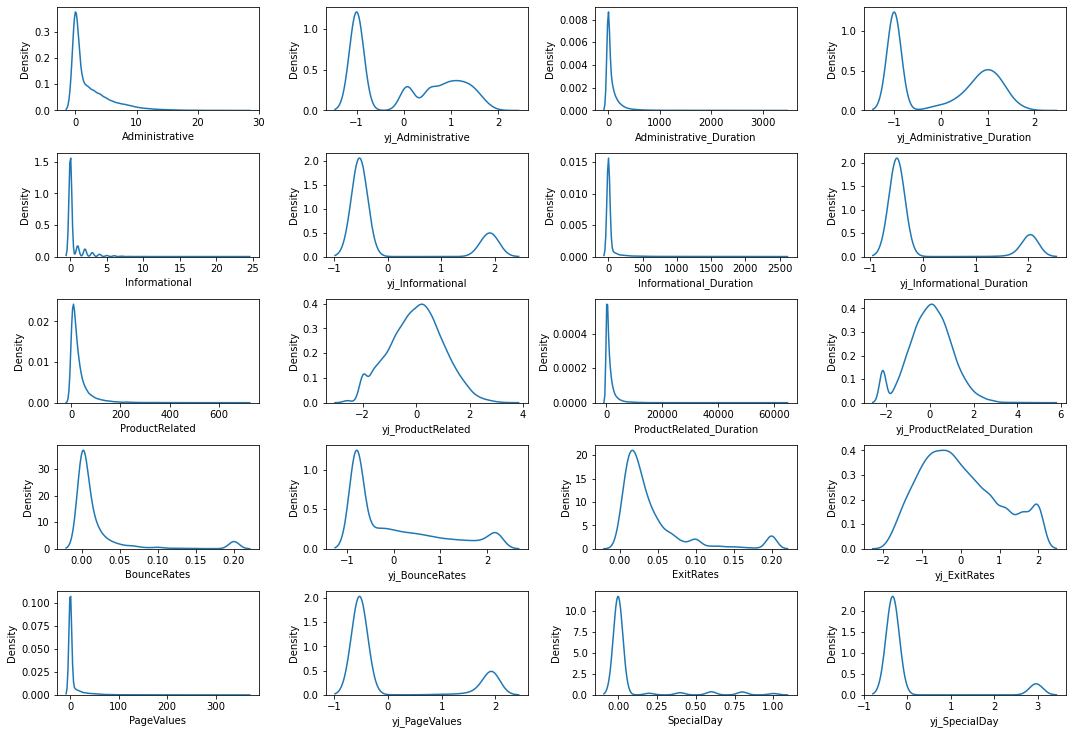

In [28]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_2, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_yeo_jo, x=nums_yj[i])

    plt.tight_layout()

In [29]:
df_ol_shop_yeo_jo[nums_yj].describe()

,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay
count,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04
mean,4.748889e-15,-2.088311e-15,1.974951e-15,-6.286364e-15,-8.452249e-16,-4.367757e-16,2.428791e-15,-9.520356e-17,-6.609470e-15,-2.453691e-14
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-9.984738e-01,-1.005468e+00,-5.238515e-01,-4.947987e-01,-2.580459e+00,-2.168082e+00,-8.029476e-01,-1.811469e+00,-5.328007e-01,-3.376299e-01
25%,-9.984738e-01,-1.005468e+00,-5.238515e-01,-4.947987e-01,-6.460268e-01,-6.320189e-01,-8.029476e-01,-7.637588e-01,-5.328007e-01,-3.376299e-01
50%,7.440136e-02,1.030641e-01,-5.238515e-01,-4.947987e-01,2.542071e-02,1.985934e-02,-4.793771e-01,-1.694811e-01,-5.328007e-01,-3.376299e-01
75%,1.028024e+00,9.744059e-01,-5.238515e-01,-4.947987e-01,6.782554e-01,6.527018e-01,6.366262e-01,7.206251e-01,-5.328007e-01,-3.376299e-01
max,1.978077e+00,2.015436e+00,1.993723e+00,2.077830e+00,3.374537e+00,5.338706e+00,2.219446e+00,2.011278e+00,1.979914e+00,2.972664e+00


##### Feature Transformation yang digunakan untuk dataset ini adalah Yeo-Jonshon, karena dapat mengubah sebaran data mendekati normal. Dan hasil nilai yang di-scaling oleh Yeo-Jonshon bisa digunakan untuk kebutuhan handling class imbalance

#### E. Feature encoding

In [122]:
# cats = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month', 
#         'VisitorType', 'Weekend', 'Revenue']
df_ol_shop_feature_encoding = df_ol_shop_yeo_jo.copy()
df_ol_shop_feature_encoding.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay
9448,Dec,2,2,3,1,Returning_Visitor,False,False,1.171179,1.012707,-0.523851,-0.494799,1.647856,2.370122,-0.502639,-0.448569,1.705870,-0.337630
1522,Mar,2,5,1,1,Returning_Visitor,True,False,-0.998474,-1.005468,-0.523851,-0.494799,-0.646027,-0.581357,-0.802948,0.762250,-0.532801,-0.337630
2241,May,3,2,4,1,Returning_Visitor,False,False,1.171179,1.134549,1.953214,2.057584,0.848713,1.017980,-0.357716,-0.724053,1.950402,2.899571
1538,Mar,2,2,7,1,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,2.011278,-0.532801,-0.337630
5930,Aug,1,1,1,20,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,0.886844,1.266195,-0.349191,-1.083425,-0.532801,-0.337630


##### Label Encoding untuk Fitur Kategorikal

In [123]:
for col in cats:
    print('column:', col, df_ol_shop_feature_encoding[col].value_counts())

column: OperatingSystems 2    6541
1    2549
3    2530
4     478
8      75
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64
column: Browser 2     7883
1     2427
4      731
5      465
6      174
10     163
8      135
3      105
13      56
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64
column: Region 1    4714
3    2379
4    1171
2    1128
6     801
7     758
9     505
8     431
5     318
Name: Region, dtype: int64
column: TrafficType 2     3911
1     2388
3     2013
4     1066
13     728
10     450
6      443
8      343
5      260
11     247
20     193
9       41
7       40
15      37
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64
column: Month May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64
column: VisitorType Returning_Visitor    10431
New_Visitor           1693
Other                  

#### One Hot Encoding untuk fitur VisitorType

In [124]:
ohe_visitor_type = pd.get_dummies(df_ol_shop_feature_encoding['VisitorType'], prefix='visitor_type', drop_first=True, )

# print(ohe_visitor_type)
df_ol_shop_feature_encoding = df_ol_shop_feature_encoding.join(ohe_visitor_type)

df_ol_shop_feature_encoding.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay,visitor_type_Other,visitor_type_Returning_Visitor
4847,May,3,2,2,11,New_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.620640,-0.506109,-0.802948,1.610382,-0.532801,2.97265,0,0
9860,Nov,3,2,2,2,Returning_Visitor,True,True,1.780741,1.349740,1.987796,2.076781,1.325463,1.779494,0.474155,0.077718,1.858877,-0.33763,0,1
3617,May,2,2,7,4,Returning_Visitor,True,True,-0.998474,-1.005468,-0.523851,-0.494799,0.198228,0.276980,-0.802948,-1.073091,1.904437,-0.33763,0,1
8240,Dec,8,13,9,20,Other,True,True,1.171179,0.818518,-0.523851,-0.494799,-1.007465,-1.207104,-0.802948,-0.169481,-0.532801,-0.33763,1,0
7378,Jul,3,3,3,4,Returning_Visitor,False,False,1.028024,0.734266,-0.523851,-0.494799,-0.751231,-0.658251,0.726271,1.260573,-0.532801,-0.33763,0,1


#### Label Encoding untuk Fitur Weekend, Month

In [125]:
mapping_weekend = {
    False: 0,
    True: 1
}

mapping_month = {
    "Jan": 1,
    "Feb": 2, 
    "Mar": 3, 
    "Apr": 4, 
    "May": 5, 
    "June": 6, 
    "Jul": 7, 
    "Aug": 8, 
    "Sep": 9, 
    "Oct": 10, 
    "Nov": 11, 
    "Dec": 12
}



df_ol_shop_feature_encoding['Weekend'] = df_ol_shop_feature_encoding['Weekend'].map(mapping_weekend)
df_ol_shop_feature_encoding['Month'] = df_ol_shop_feature_encoding['Month'].map(mapping_month)
# df_ol_shop_feature_encoding['OperatingSystems'] = df_ol_shop_feature_encoding.apply(lambda x: map_operating_system_type(x), axis=1)
# df_ol_shop_feature_encoding['Browser'] = df_ol_shop_feature_encoding.apply(lambda x: map_browser_type(x), axis=1)
# df_ol_shop_feature_encoding['TrafficType'] = df_ol_shop_feature_encoding.apply(lambda x: map_traffic_type(x), axis=1)
df_ol_shop_feature_encoding.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay,visitor_type_Other,visitor_type_Returning_Visitor
3635,5,2,5,3,2,Returning_Visitor,1,False,-0.998474,-1.005468,-0.523851,-0.494799,-0.646027,-0.586530,-0.802948,1.298150,-0.532801,-0.33763,0,1
8247,11,2,2,3,2,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,1.072472,1.222986,-0.802948,-0.141669,-0.532801,-0.33763,0,1
6992,7,2,2,3,3,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.366868,-1.518259,-0.802948,1.150838,-0.532801,-0.33763,0,1
10572,11,3,2,9,1,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.620640,-2.168082,2.219446,2.011278,-0.532801,-0.33763,0,1
8890,11,1,1,1,1,Other,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,2.011278,-0.532801,-0.33763,1,0


#### Fitur Encoding untuk fiture OS, browser type, traffic type, region

#### Encoding menggunakan Nilai Threshold

In [126]:
from collections import Counter
def cumulatively_categorise(column,threshold=0.90,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  #Append the category Other to the list
  categories_list.append(0)

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 0)

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  #Return only the transformed column if return_categories=False
  else:
    return new_column


In [127]:
#Call the function with a default threshold of 75%
transformed_column_os, new_category_list_os = cumulatively_categorise(df_ol_shop_feature_encoding['OperatingSystems'], return_categories_list=True)
transformed_column_browser, new_category_list_browser = cumulatively_categorise(df_ol_shop_feature_encoding['Browser'], return_categories_list=True)
transformed_column_traffic_type, new_category_list_traffic_type = cumulatively_categorise(df_ol_shop_feature_encoding['TrafficType'], return_categories_list=True)
transformed_column_region, new_category_list_region = cumulatively_categorise(df_ol_shop_feature_encoding['Region'], return_categories_list=True)

In [128]:
df_ol_shop_feature_encoding['OperatingSystems'] = transformed_column_os
df_ol_shop_feature_encoding['Browser'] = transformed_column_browser
df_ol_shop_feature_encoding['TrafficType'] = transformed_column_traffic_type
df_ol_shop_feature_encoding['Region'] = transformed_column_region

In [129]:
df_ol_shop_feature_encoding['OperatingSystems'].value_counts()

2    6541
1    2549
3    2530
0     585
Name: OperatingSystems, dtype: int64

In [130]:
df_ol_shop_feature_encoding['Browser'].value_counts()

2    7883
1    2427
0    1164
4     731
Name: Browser, dtype: int64

In [131]:
df_ol_shop_feature_encoding['TrafficType'].value_counts()

2     3911
1     2388
3     2013
0     1206
4     1066
13     728
10     450
6      443
Name: TrafficType, dtype: int64

In [132]:
df_ol_shop_feature_encoding['Region'].value_counts()

1    4714
3    2379
4    1171
2    1128
6     801
7     758
0     749
9     505
Name: Region, dtype: int64

##### Dengan menggunakan Encoding Threshold, nilai unik untuk fitur OperatingSystems, Browser, TrafficType, Region menjadi lebih sedikit. Sehingga diharapkan performa model menjadi lebih baik

In [133]:
df_ol_shop_feature_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Month                           12205 non-null  int64  
 1   OperatingSystems                12205 non-null  int64  
 2   Browser                         12205 non-null  int64  
 3   Region                          12205 non-null  int64  
 4   TrafficType                     12205 non-null  int64  
 5   VisitorType                     12205 non-null  object 
 6   Weekend                         12205 non-null  int64  
 7   Revenue                         12205 non-null  bool   
 8   yj_Administrative               12205 non-null  float64
 9   yj_Administrative_Duration      12205 non-null  float64
 10  yj_Informational                12205 non-null  float64
 11  yj_Informational_Duration       12205 non-null  float64
 12  yj_ProductRelated               

#### F. Handle class imbalance

In [36]:
df_ol_shop_feature_encoding['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

#### Distribusi nilai unik pada target mengalami ketimpangan, sehingga perlu dilakukan handling class imbalance 

Memisahkan data fitur dengan label

In [37]:
x = df_ol_shop_feature_encoding[[col for col in df_ol_shop_feature_encoding.columns if col not in ['VisitorType','Revenue']]].values
y = df_ol_shop_feature_encoding['Revenue'].values

Split untuk data training dan test

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

##### Over Sampling

In [71]:
x_train_over_SMOTE, y_train_over_SMOTE = over_sampling.SMOTE(0.6,random_state=123).fit_resample(x_train, y_train)

In [72]:
print('Nilai unik target sebelum oversampling:\n', pd.Series(y).value_counts())
print('Nilai unik target sesudah oversampling:\n', pd.Series(y_train_over_SMOTE).value_counts())

Nilai unik target sebelum oversampling:
 False    10297
True      1908
Name: Revenue, dtype: int64
Nilai unik target sesudah oversampling:
 False    8268
True     4960
dtype: int64


#### Karena nilai unik target mengalami ketimpangan yang cukup jauh, maka dilakukan Handling Class Imbalance dengan cara melakukan oversampling dengan menggunakan ***SMOTE*** pembagian ***False/True*** pada rasio 5:3 untuk menghidanri ***overfitting*** pada model

***
## **2. Feature Engineering**
***

**Import library**

In [41]:
# import library
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn import preprocessing

**Split Features and Target**

In [42]:
# split feature and target

# features
X = df_ol_shop_feature_encoding.drop(['Revenue'], axis=1)
# target
y = df_ol_shop_feature_encoding['Revenue'].copy()

**Pengelompokan feature setelah dilakukan Transformasi dan Encoding**

In [43]:
# pengelompokan kolom berdasarkan jenisnya

dnums = ['yj_Administrative', 'yj_Administrative_Duration', 'yj_Informational',
       'yj_Informational_Duration', 'yj_ProductRelated', 'yj_ProductRelated_Duration',
       'yj_BounceRates', 'yj_ExitRates', 'yj_PageValues', 'yj_SpecialDay']

dcats = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month',
        'visitor_type_Other','visitor_type_Returning_Visitor', 'Weekend']

nums_target =['yj_Administrative', 'yj_Administrative_Duration', 'yj_Informational',
                       'yj_Informational_Duration', 'yj_ProductRelated', 'yj_ProductRelated_Duration',
                       'yj_BounceRates', 'yj_ExitRates', 'yj_PageValues', 'yj_SpecialDay', 'Revenue']

**Korelasi Features numerical terhadap target**

<AxesSubplot:>

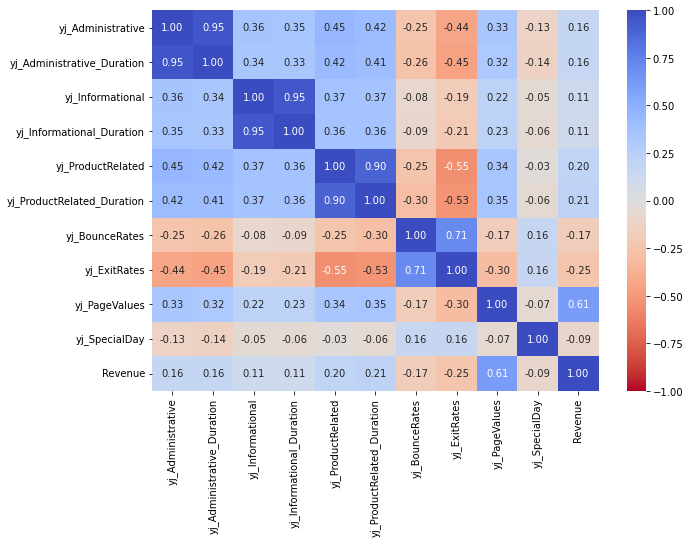

In [44]:
# ploting the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df_ol_shop_feature_encoding[nums_target].corr(), cmap='coolwarm_r', annot=True, fmt='.2f',vmin=-1, vmax=1)

***
### **2.A Feature selection**

Kategori features yang bisa di-drop dari hasil Univariate dan Multivariate analysis adalah sbb : <br>

1. Feature kategorikal yg hanya punya 1 atau 2 data yg dominan  --> Browser dan Region <br>
2. Feature kategorical dengan jumlah nilai unique nya banyak  --> TrafficType. Untuk type ini akan dilakukan Thershold untuk mengurangi jumlah nunique- nya.<br>
3. Salah satu dari 2 feature yang berkorelasi dengan nilai > 0.7 (redundant) --> ExitRate <br>

Asumsi awal features yang berpeluang untuk di-drop adalah : **Browser, Region, ExitRate**

**Asumsi** ini akan dicoba dilakukan **validasi** dengan **metode feature selection** dibawah.

#### **2.A.1 Feature selection for Numerical data**

**REDUNDANT FEATURES**

premis : jika 2 feature berkorelasi dengan nilai > 0.7 maka feature tersebut redundant dan bisa di-drop salah satunya

In [45]:
# function to get features correlation with threshold > 0.7

def correlation(dataset, threshold):
    col_corr = [] 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.append(colname)
    return col_corr 

corr_features = correlation(df_ol_shop_feature_encoding[dnums], 0.7)
corr_features

['yj_Administrative_Duration',
 'yj_Informational_Duration',
 'yj_ProductRelated_Duration',
 'yj_ExitRates']

***
Feature **ExitRates** berkorelasi  dengan **BounceRates** dengan nilai diatas 0.7 sehingga masuk kategori redundant feature. <br>
**Tiap Page Duration** berkorelasi kuat dengan **masing-masing page**. Namun feature2 ini akan dilakukan feature extraction pada point 2.B.<br>
***

**ANOVA f-test Feature Selection**

Method ini cocok untuk tipe data features numerical denga target berupa categorial

Feature yj_Administrative : 338.874
Feature yj_Administrative_Duration : 338.578
Feature yj_Informational : 152.135
Feature yj_Informational_Duration : 143.686
Feature yj_ProductRelated : 492.61
Feature yj_ProductRelated_Duration : 569.296
Feature yj_BounceRates : 374.634
Feature yj_ExitRates : 812.582
Feature yj_PageValues : 7292.268
Feature yj_SpecialDay : 95.393


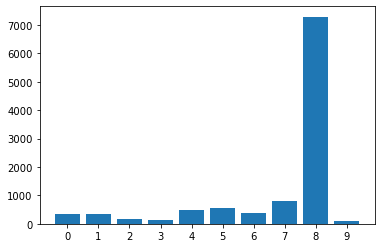

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X[dnums], y)

# transform train input data
X_fs = fs.transform(X[dnums])

# what are scores for the features
for i in range(len(dnums)):
     print(f'Feature {dnums[i]} : {round(fs.scores_[i],3)}')

# plot the scores
pyplot.bar([i for i in range(len(dnums))], fs.scores_)
pyplot.xticks (np.arange(0, 10, step=1))
pyplot.show()

***
Dari hasil ANOVA f-test Feature Selection terlihat bahwa feature **PageValue** adalah fitur yang paling relevan. <br>
Hal ini karena Page value merupakan nilai rata-rata untuk page yang dikunjungi pengguna sebelum menyelesaikan transaksi yang menghasilkan revenue.

Feature-feature lain tersebar dengan nilai relevansi yang tidak jauh berbeda. <br>
***

**MUTUAL INFORMATION**

premis : semakin tingggi nilai mutual info maka semakin penting feature tersebut

In [47]:
# determine the mutual information
mutual_info = mutual_info_classif(X[dnums], y)
mutual_info

array([0.01339378, 0.02092425, 0.0017147 , 0.00066866, 0.01900639,
       0.03150786, 0.02013055, 0.04264051, 0.16525946, 0.00396771])

In [48]:
# ordering the features
mutual_info = pd.Series(mutual_info)
mutual_info.index = X[dnums].columns
mutual_info.sort_values(ascending=False)

yj_PageValues                 0.165259
yj_ExitRates                  0.042641
yj_ProductRelated_Duration    0.031508
yj_Administrative_Duration    0.020924
yj_BounceRates                0.020131
yj_ProductRelated             0.019006
yj_Administrative             0.013394
yj_SpecialDay                 0.003968
yj_Informational              0.001715
yj_Informational_Duration     0.000669
dtype: float64

<AxesSubplot:>

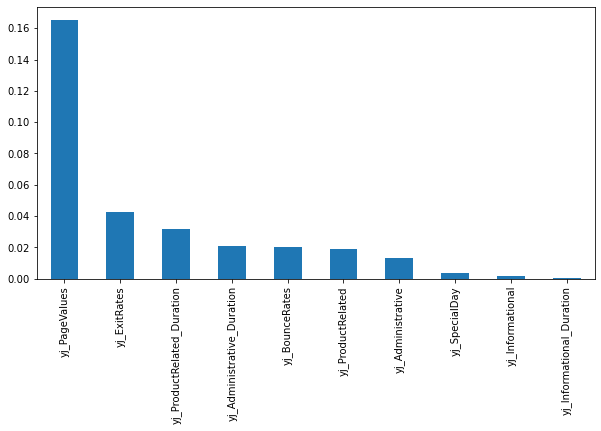

In [49]:
# plotting
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10, 5))

***
feature dengan nilai mutual_info terendah  adalah **SpecialDay**. Feature ini mempunyai nilai korelasi terhadap target sebesar -0.09 pada plot heatmap. <br>
Sedangkan untuk feature **Informational** akan dilakukan feature extraction pada 2.B

| **Asumsi Awal**     | **Konfirmasi**|
|----------------------- |------------- |
|Browser | |
|Region  |        |
|ExitRates | ExitRate|
| | SpecialDay|

***

#### **2.A.1 Feature selection for Categoricals data**

**Define Hypothesis**

Null Hypothesis (H0): feature tidak berkorelasi terhadap target.

Alternate Hypothesis (H1): feature berkorelasi terhadap target.

In [50]:
from scipy.stats import chi2, chi2_contingency

In [51]:
c = 'Revenue'
for r in dcats :
        cont = pd.crosstab(df_ol_shop_feature_encoding[c], df_ol_shop_feature_encoding[r])
        X2, p, dof, expected = chi2_contingency(cont)
        if (p<=0.05) :
            stat = 'Berkorelasi dengan'
        else :
            stat = 'Tidak berkorelasi dengan'
        print (c+' '+stat+' '+r+' dengan nilai p value= '+str(round(p,7)) )

Revenue Berkorelasi dengan OperatingSystems dengan nilai p value= 0.0
Revenue Berkorelasi dengan Browser dengan nilai p value= 0.0037828
Revenue Tidak berkorelasi dengan Region dengan nilai p value= 0.2882562
Revenue Berkorelasi dengan TrafficType dengan nilai p value= 0.0
Revenue Berkorelasi dengan Month dengan nilai p value= 0.0
Revenue Tidak berkorelasi dengan visitor_type_Other dengan nilai p value= 0.3837685
Revenue Berkorelasi dengan visitor_type_Returning_Visitor dengan nilai p value= 0.0
Revenue Berkorelasi dengan Weekend dengan nilai p value= 0.0024138


***
Dari hasil Chi-squared test dengan nilai confidence interval 95% terlihat bahwa feature **Region dan visitor_type_other** adalah fitur yang tidak berkorelasi dengan fitur target Revenue (H0). <br>
Hal ini bisa menjadi insight bahwa region(daerah) dari customer tidak mempengaruhi pembelian mereka. 

Feature-feature kategorikal lain tetap dipertahankan. <br>
***

***
#### **KESIMPULAN**

Dari Analisa diatas maka disimpulkan bahwa : <br>
1. Feature numerik yang akan di drop adalah : **ExitRates**. <br>
2. Feature **Special Day** dengan nilai mutual_info terendah untuk sementara akan di-keep untuk melihat pengaruhnya pada pemodelan machine learning.
2. Feature kategorical yang akan di drop adalah : **Region, visitor_type_Other** 



***

#### **DROP FEATURE PADA DATAFRAME**

In [52]:
# droping features
df_select = df_ol_shop_feature_encoding.drop(['yj_ExitRates','Region','visitor_type_Other'], axis=1)

df_select.head(3)

,Month,OperatingSystems,Browser,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_PageValues,yj_SpecialDay,visitor_type_Returning_Visitor
0,2,1,1,1,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,-0.532801,-0.33763,1
1,2,2,2,2,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.620640,-1.115160,-0.802948,-0.532801,-0.33763,1
2,2,4,1,3,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,-0.532801,-0.33763,1


***
### **2.B Feature extraction**

#### **2.B.1 Total Visit**

Merupakan Total jumlah page yang dikunjungi per masing-masing sesi

In [53]:
# Total durasi kunjungan per masing-masing sesi
df_ex = df_select.copy()
df_ex['totalPage_visit'] = df_ex['yj_Administrative'] + df_ex['yj_Informational'] + df_ex ['yj_ProductRelated']


In [54]:
df_ex.sample(5)

,Month,OperatingSystems,Browser,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_PageValues,yj_SpecialDay,visitor_type_Returning_Visitor,totalPage_visit
572,3,1,1,3,Returning_Visitor,1,False,-0.998474,-1.005468,1.807721,1.954424,0.309362,0.514792,1.608533,-0.532801,-0.33763,1,1.118609
4447,5,2,2,1,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-0.316462,0.412368,0.726271,-0.532801,-0.33763,1,-1.838787
11921,12,2,2,2,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,0.157980,-0.347040,0.133598,-0.532801,-0.33763,1,-1.364345
501,3,1,6,1,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,0.439318,0.420509,-0.090325,-0.532801,-0.33763,1,-1.083007
4784,5,1,1,4,New_Visitor,0,False,0.074401,0.325262,-0.523851,-0.494799,-0.187754,-0.172871,-0.802948,-0.532801,-0.33763,0,-0.637204


#### **2.B.2 Total Duration**

Total durasi kunjungan per masing-masing sesi

In [55]:
# Total durasi kunjungan per masing-masing sesi
df_ex['total_duration'] = df_ex['yj_Administrative_Duration'] + df_ex['yj_Informational_Duration'] + df_ex ['yj_ProductRelated_Duration']

In [56]:
df_ex.sample(5)

,Month,OperatingSystems,Browser,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_PageValues,yj_SpecialDay,visitor_type_Returning_Visitor,totalPage_visit,total_duration
11337,12,2,7,10,Returning_Visitor,1,False,0.834177,0.922118,1.807721,2.023116,-0.023399,0.142428,-0.802948,-0.532801,-0.33763,1,2.618498,3.087662
73,2,2,4,2,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-0.646027,-0.200480,-0.802948,-0.532801,-0.33763,1,-2.168352,-1.700747
3562,5,2,5,3,Returning_Visitor,0,False,1.372224,1.325987,1.953214,1.954424,0.678255,1.024001,-0.301167,1.746205,-0.33763,1,4.003694,4.304411
11263,12,2,2,2,Returning_Visitor,0,False,1.372224,1.327575,-0.523851,-0.494799,-0.388342,-0.349418,-0.802948,-0.532801,-0.33763,1,0.460031,0.483358
3032,5,2,2,3,Returning_Visitor,1,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.007465,-0.711296,1.568915,-0.532801,-0.33763,1,-2.529790,-2.211563


#### **2.B.3 Rasio (Duration/Page)**

In [57]:
df_ex['adm_rasio'] = df_ex['yj_Administrative_Duration'] / df_ex['yj_Administrative']
df_ex['info_rasio'] = df_ex['yj_Informational_Duration'] / df_ex['yj_Informational']
df_ex['product_rasio'] = df_ex['yj_ProductRelated_Duration'] / df_ex['yj_ProductRelated']

df_ex['adm_rasio'] = df_ex['adm_rasio'].fillna(0)
df_ex['info_rasio'] = df_ex['info_rasio'].fillna(0)
df_ex['product_rasio'] = df_ex['product_rasio'].fillna(0)

df_ex.head(5)

,Month,OperatingSystems,Browser,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,...,yj_ProductRelated_Duration,yj_BounceRates,yj_PageValues,yj_SpecialDay,visitor_type_Returning_Visitor,totalPage_visit,total_duration,adm_rasio,info_rasio,product_rasio
0,2,1,1,1,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,...,-2.168082,2.219446,-0.532801,-0.33763,1,-3.498917,-3.668349,1.007005,0.94454,1.096879
1,2,2,2,2,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,...,-1.115160,-0.802948,-0.532801,-0.33763,1,-3.142966,-2.615427,1.007005,0.94454,0.688098
2,2,4,1,3,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,...,-2.168082,2.219446,-0.532801,-0.33763,1,-3.498917,-3.668349,1.007005,0.94454,1.096879
3,2,3,2,4,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,...,-1.938936,1.772681,-0.532801,-0.33763,1,-3.142966,-3.439203,1.007005,0.94454,1.196401
4,2,3,3,4,Returning_Visitor,1,False,-0.998474,-1.005468,-0.523851,...,0.039282,0.827019,-0.532801,-0.33763,1,-1.988715,-1.460985,1.007005,0.94454,-0.084225


***
### **2.C Feature tambahan**

1. Customer ID - Data memiliki unique value dan bisa diketahui dan dilakukan tracing perilaku konsumen dan transaksi berulang
2. Returning Page - Untuk dapat mengetahui page-page mana yang dibuka berulang kali, hal ini menandakan ketertarikan konsumen pada page tersebut
3. Seller Reputation - Asumsinya reputasi seller akan berpengaruh pada minat beli dan keputusan beli
4. Satisfaction Score - untuk mengetahui kepuasan terhadap transaksi di web dan kaitannya apakah dapat meningkatkan revenue
5. Product in Basket - fitur ini dapat mengetahui user yang memiliki minat beli namun belum melakukan transaksi.
6. Gender - Fitur ini bertujuan untuk mengetahui sebaran revenue per masing-masing Jenis kelamin user